<a href="https://colab.research.google.com/github/Basharat151214/Analytics-For-FAST-Alumni-Network/blob/main/geolocation_of_Alumni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install geopandas
#!pip install pycountry
#!pip install pycountry-convert
#!pip install mapclassify==2.4.3
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import geopandas as gpd
import re

In [ ]:
import sys
'geopandas' in sys.modules

True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_preprocess_data.csv to final_preprocess_data.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['final_preprocess_data.csv'].decode('utf-8')))
#df

In [ ]:
df['job_location'] = df['job_location'].apply(lambda x: x.replace("islamabad", "islamabad"))
df['job_location'] = df['job_location'].apply(lambda x: x.replace("karachi", "karachi"))
df['skills'] = df['skills'].apply(lambda x: x.replace("||", ","))

In [ ]:
df.to_csv (r'.\export_dataframe.csv', index = False, header=True)

In [ ]:
clist=['Afghanistan','Albania','Algeria','Andorra','Angola','Antigua & Deps','Argentina','Armenia','Australia','Austria','Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin','Bhutan','Bolivia','Bosnia Herzegovina','Botswana','Brazil','Brunei','Bulgaria','Burkina','Burundi','Cambodia','Cameroon','Canada','Cape Verde','Central African Rep','Chad','Chile','China','Colombia','Comoros','Congo','Congo {Democratic Rep}','Costa Rica','Croatia','Cuba','Cyprus','Czech Republic','Denmark','Djibouti','Dominica','Dominican Republic','East Timor','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Ethiopia','Fiji','Finland','France','Gabon','Gambia','Georgia','Germany','Ghana','Greece','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland ','Israel','Italy','Ivory Coast','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','Korea North','Korea South','Kosovo','Kuwait','Kyrgyzstan','Laos','Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania','Luxembourg','Macedonia','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta','Marshall Islands','Mauritania','Mauritius','Mexico','Micronesia','Moldova','Monaco','Mongolia','Montenegro','Morocco','Mozambique','Myanmar','Namibia','Nauru','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria','Norway','Oman','Pakistan','Palau','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Qatar','Romania','Russian Federation','Rwanda','St Kitts & Nevis','St Lucia','Saint Vincent & the Grenadines','Samoa','San Marino','Sao Tome & Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone','Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Sudan','Spain','Sri Lanka','Sudan','Suriname','Swaziland','Sweden','Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Togo','Tonga','Trinidad & Tobago','Tunisia','Turkey','Turkmenistan','Tuvalu','Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan','Vanuatu','Vatican City','Venezuela','Vietnam','Yemen','Zambia','Zimbabwe']
for i in range(len(clist)):
    clist[i] = clist[i].lower()    
#clist

In [ ]:
reg = '(%s)' % '|'.join(clist)
df['CountryName'] = df['job_location'].str.extract(reg)
#df

# Impute / Replace Missing Values with Mode

In [ ]:
df['CountryName'] = df['CountryName'].fillna(df['CountryName'].mode()[0])

In [ ]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    CODE1=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.CountryName)
#df.head()

In [ ]:
df_value_counts=df["CountryName"].value_counts()
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['CountryName', 'Alumni']
df_value_counts.CountryName = df_value_counts.CountryName.str.title()
df_value_counts.head(10)

,CountryName,Alumni
0,Pakistan,2000
1,United States,36
2,United Kingdom,21
3,United Arab Emirates,17
4,Canada,15
5,Germany,11
6,Sweden,4
7,Saudi Arabia,3
8,Australia,2
9,Qatar,2


In [ ]:
# generate country code  based on country name 
import pycountry 
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def alpha2code(column):
    CODE=[]
    COUNTRY=[]
    COUNTRY1=[]
    CONTINENT=[]
    for country in column:
        try:
            code=(pycountry.countries.get(name=country).alpha_2,country_alpha2_to_continent_code(pycountry.countries.get(name=country).alpha_2))
            countr=pycountry.countries.get(name=country).alpha_2
            countr1=pycountry.countries.get(name=country).alpha_3
            conti=country_alpha2_to_continent_code(pycountry.countries.get(name=country).alpha_2)      

            CODE.append(code)
            COUNTRY.append(countr)
            COUNTRY1.append(countr1)
            CONTINENT.append(conti)
        except:
            CODE.append('None')
            COUNTRY.append('None')
            COUNTRY1.append('None')
            CONTINENT.append('None')

    return (CODE,COUNTRY,CONTINENT,COUNTRY1)
# create a column for code 
(df_value_counts['Code'],df_value_counts['Country'],df_value_counts['Continent'],df_value_counts['CODE']) =alpha2code(df_value_counts.CountryName)

df_value_counts.head()


,CountryName,Alumni,Code,Country,Continent,CODE
0,Pakistan,2000,"(PK, AS)",PK,AS,PAK
1,United States,36,"(US, NA)",US,NA,USA
2,United Kingdom,21,"(GB, EU)",GB,EU,GBR
3,United Arab Emirates,17,"(AE, AS)",AE,AS,ARE
4,Canada,15,"(CA, NA)",CA,NA,CAN


In [ ]:
#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
 
#Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="my_request")
 
#applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
#Applying the method to pandas DataFrame
df_value_counts['Geolocate'] = df_value_counts['CountryName'].apply(geocode)
df_value_counts['Latitude'] = df_value_counts['Geolocate'].apply(lambda x: x.latitude if x else None)
df_value_counts['Longitude'] = df_value_counts['Geolocate'].apply(lambda x: x.longitude if x else None)

 
df_value_counts.head()

,CountryName,Alumni,Code,Country,Continent,CODE,Geolocate,Latitude,Longitude
0,Pakistan,2000,"(PK, AS)",PK,AS,PAK,"(پاکستان, (30.3308401, 71.247499))",30.330840,71.247499
1,United States,36,"(US, NA)",US,NA,USA,"(United States, (39.7837304, -100.445882))",39.783730,-100.445882
2,United Kingdom,21,"(GB, EU)",GB,EU,GBR,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575
3,United Arab Emirates,17,"(AE, AS)",AE,AS,ARE,"(الإمارات العربية المتحدة, (24.0002488, 53.999...",24.000249,53.999483
4,Canada,15,"(CA, NA)",CA,NA,CAN,"(Canada, (61.0666922, -107.991707))",61.066692,-107.991707


[link text](https://)# Create a world map

In [ ]:
#title Default title text
#installation
#!pip install folium
# Create a world map to show distributions of of Alumni  
import folium
from folium.plugins import MarkerCluster
#empty map
world_map = folium.Map()
#world_map= folium.Map(tiles="cartodbpositron")  #cartodbdark_matter  cartodbpositron, Stamen Toner
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df_value_counts)):
        lat = df_value_counts.iloc[i]['Latitude']
        longn = df_value_counts.iloc[i]['Longitude']
        radius=10
        popup_text = """<div style="background-color: lightyellow; color: black; padding: 3px; border: 2px solid black; border-radius: 3px;"> Country: {}<br> # of Alumni: {}<br> </div>"""
        popup_text = popup_text.format(df_value_counts.iloc[i]['CountryName'],
                                   df_value_counts.iloc[i]['Alumni']
                                   )

        folium.CircleMarker(location = [lat, longn], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

# Data Visualization: How To Plot A Map with Geopandas in Python

In [ ]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df_value_counts,on='CODE')


In [ ]:
#cmap= 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet'

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


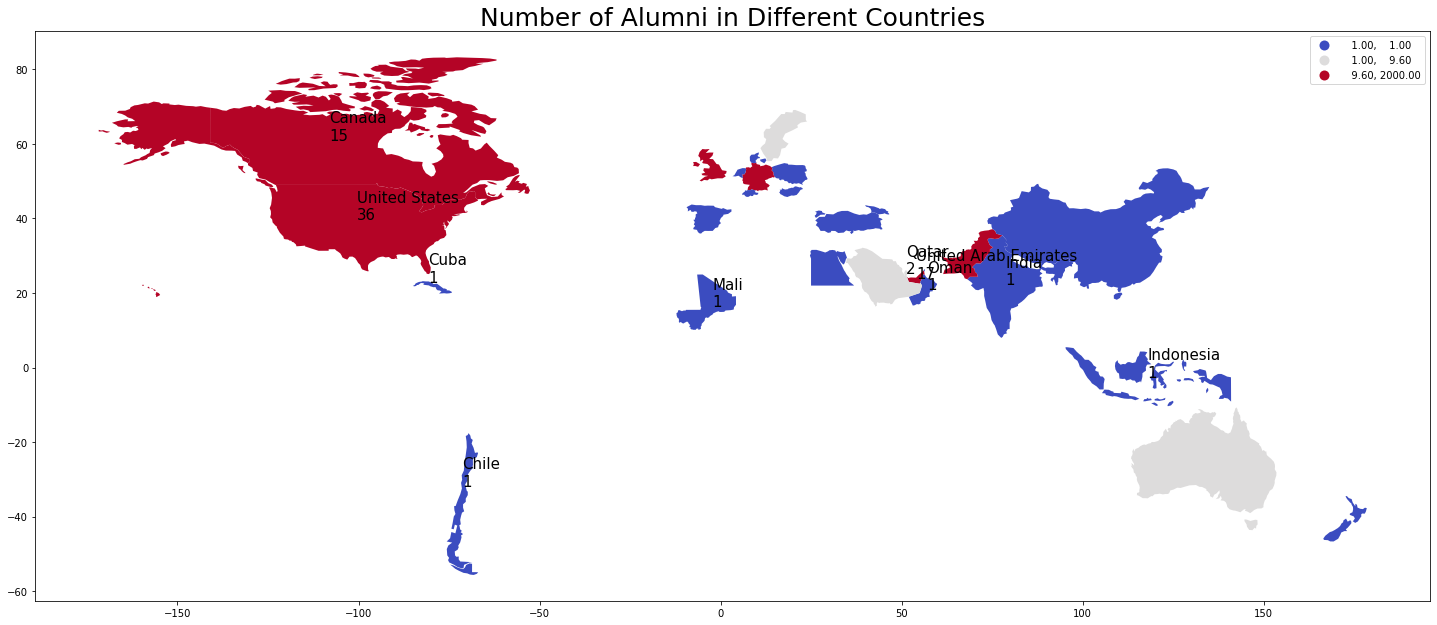

In [ ]:
# plot Number of Alumni world map 

merge.plot(column='Alumni', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Number of Alumni in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.Longitude[i]),float(merge.Latitude[i]),"{}\n{}".format(merge.CountryName[i],merge.Alumni[i]),size=15)
plt.show()

In [ ]:
#import geopandas
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['Current_Job','Current_Company','Total_year','job_location','Last_University','Last_degree','Graduation_end_year'],return_df=True)
df=encoder.fit_transform(df)
df

,Name,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills,Country,CODE
0,abrar javed,1,1,1,1,1,2015,1,1,/in/abrar-javed-49854b14b/,"management,microsoft excel,customer service,st...",pakistan,PAK
1,mahrukh fatima,2,2,2,2,2,2014,2,1,/in/mahrukh-fatima-60b863106/,"microsoft office,customer service,microsoft ex...",pakistan,PAK
2,neha nadeem,3,3,3,3,3,2016,1,1,/in/nehanadeem/,"business intelligence (bi),data analysis,data ...",united states,USA
3,abdul rafeh,4,4,2,4,4,2017,2,1,/in/rafeh11/,"microsoft office,microsoft excel,powerpoint,re...",united states,USA
4,areeba ayyaz,5,5,4,5,3,2016,1,1,/in/areeba-ayyaz-6948071a3/,"java,ruby on rails,problem solving,android dev...",pakistan,PAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,muhammad siddique,643,750,1,2,207,2020,1,186,/in/muhammad-siddique-58480117/,"market research,marketing management,team mana...",pakistan,PAK
2129,agha hamza waheed,1265,751,233,2,6,2012,8,1,/in/agha-hamza-waheed-bb2384b1/,"microsoft office,team management,auditing,fina...",pakistan,PAK
2130,mian muhammad faizan elahi,100,752,416,5,10,2020,7,44,/in/mian-muhammad-faizan-elahi/,"business analytics,digital marketing,search en...",pakistan,PAK
2131,hajra arshad,1266,1,196,9,10,2020,7,19,/in/hajra-arshad/,"adobe photoshop,microsoft excel,microsoft word...",pakistan,PAK


In [ ]:
df.corr()

,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_end_year,Last_University
Current_Company,1.000000,0.390651,0.451551,0.171329,0.206330,0.136095,0.214329
Current_Job,0.390651,1.000000,0.304366,0.098939,0.151052,0.070487,0.147288
Total_year,0.451551,0.304366,1.000000,0.127285,0.199131,0.229875,0.183485
job_location,0.171329,0.098939,0.127285,1.000000,0.119473,0.047437,0.188402
Last_degree,0.206330,0.151052,0.199131,0.119473,1.000000,0.127134,0.349938
Graduation_end_year,0.136095,0.070487,0.229875,0.047437,0.127134,1.000000,0.106928
Last_University,0.214329,0.147288,0.183485,0.188402,0.349938,0.106928,1.000000


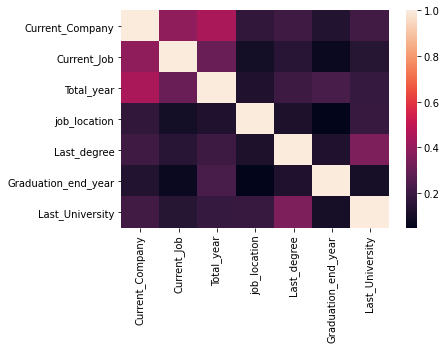

In [ ]:
sns.heatmap(df.corr());


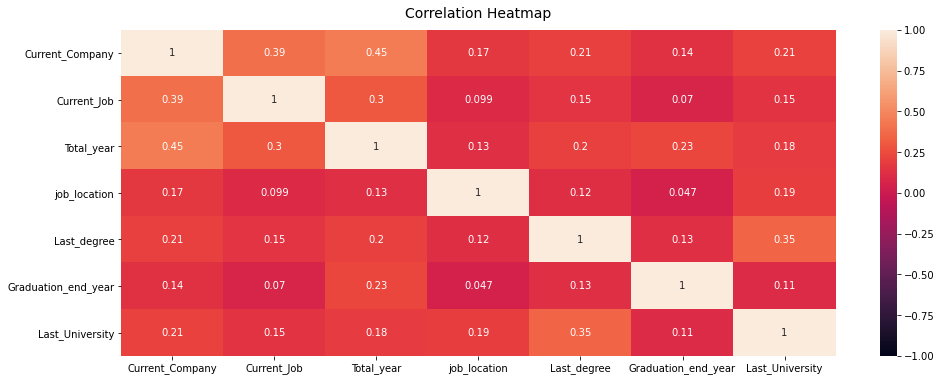

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

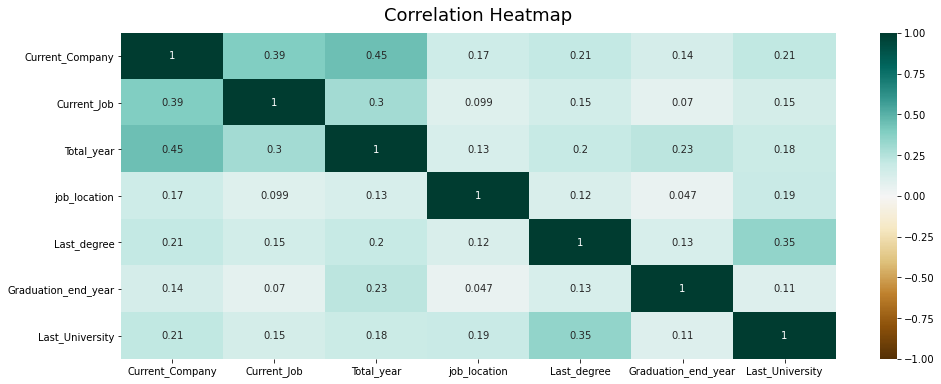

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
np.triu(np.ones_like(df.corr()))


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

<ipython-input-24-883e47a13233>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


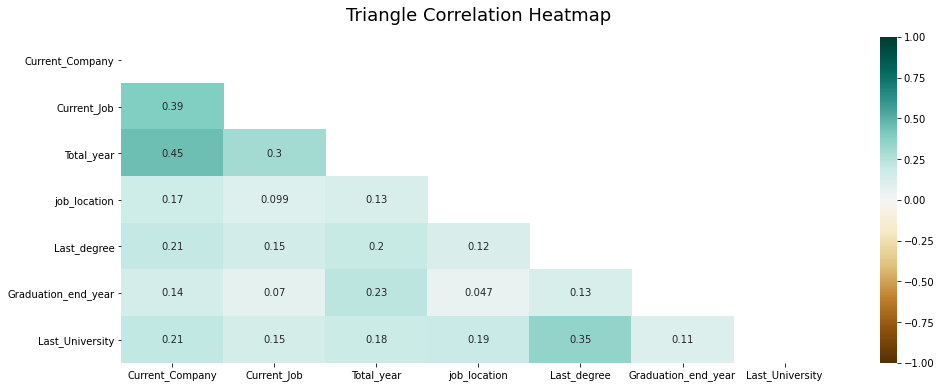

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df.corr()[['Current_Job']].sort_values(by='Current_Job', ascending=False)

,Current_Job
Current_Job,1.000000
Current_Company,0.390651
Total_year,0.304366
Last_degree,0.151052
Last_University,0.147288
job_location,0.098939
Graduation_end_year,0.070487


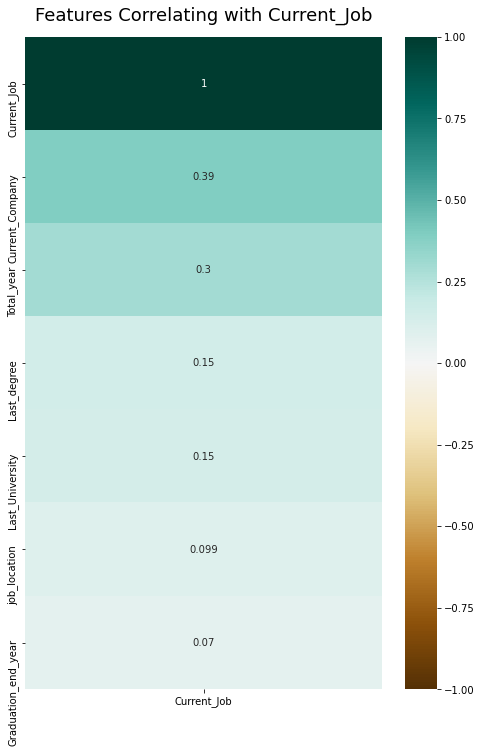

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Current_Job']].sort_values(by='Current_Job', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Current_Job', fontdict={'fontsize':18}, pad=16);